Using matplotlib as 2D backend.
Opening raw data file /Users/daniel/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


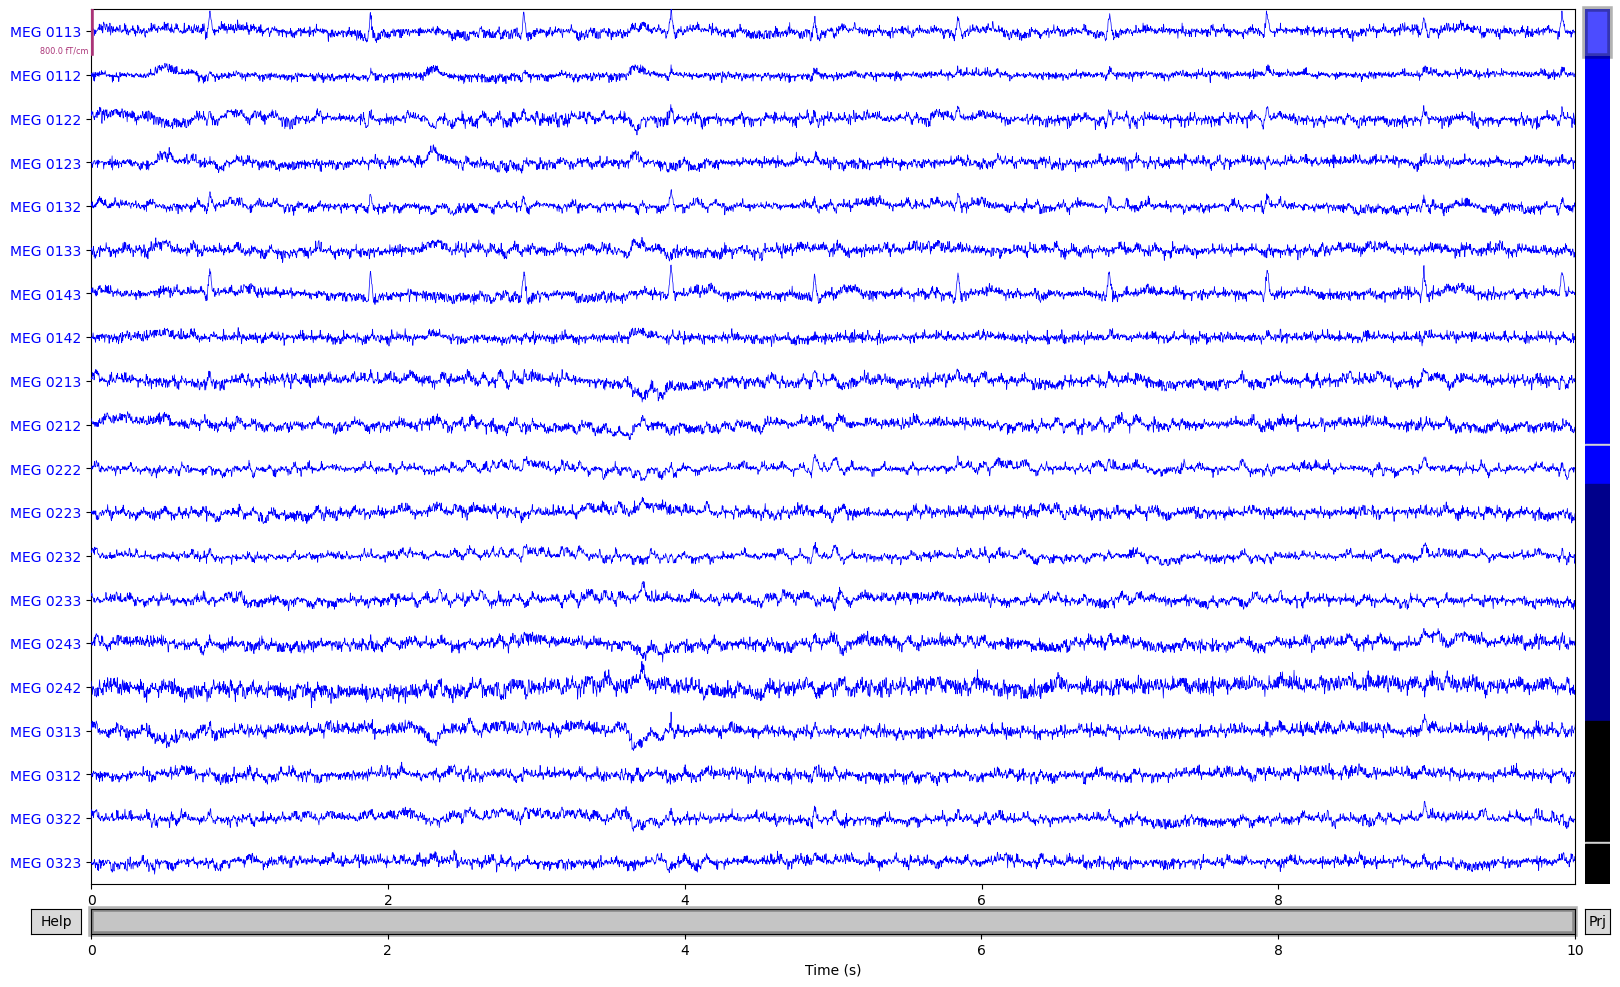

In [1]:
import mne
import matplotlib.pyplot as plt

mne.viz.set_browser_backend("matplotlib")

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / \
    "MEG" / "sample" / "sample_audvis_raw.fif"
# the preload flag loads the data into memory now
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw.crop(tmax=10.0)  # raw.crop() always happens in-place
fig_orig = raw.plot(show=False)

In [2]:
mne.sys_info()

Platform             macOS-14.4.1-arm64-arm-64bit
Python               3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:54:21) [Clang 16.0.6 ]
Executable           /Users/daniel/.pyenv/versions/conda-paths-3.12/bin/python
CPU                  arm (8 cores)
Memory               16.0 GB

Core
├☑ mne               1.7.0 (latest release)
├☑ numpy             1.26.4 (unknown linalg bindings)
├☑ scipy             1.13.0
└☑ matplotlib        3.8.4 (backend=module://matplotlib_inline.backend_inline)

Numerical (optional)
├☑ sklearn           1.4.2
├☑ numba             0.59.1
├☑ nibabel           5.2.1
├☑ nilearn           0.10.4
├☑ dipy              1.9.0
├☑ openmeeg          2.5.8
├☑ pandas            2.2.2
├☑ h5io              0.2.2
├☑ h5py              3.11.0
└☐ unavailable       cupy

Visualization (optional)
├☑ pyvista           0.43.5 (OpenGL 4.1 Metal - 88 via Apple M1)
├☑ pyvistaqt         0.11.0
├☑ vtk               9.2.6
├☑ qtpy              2.4.1 (PyQt5=5.15.8)
├☑ ipympl   

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


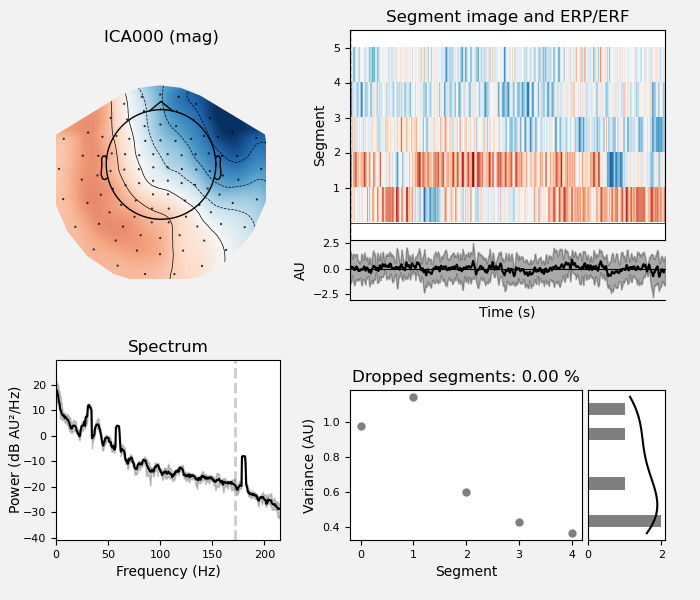

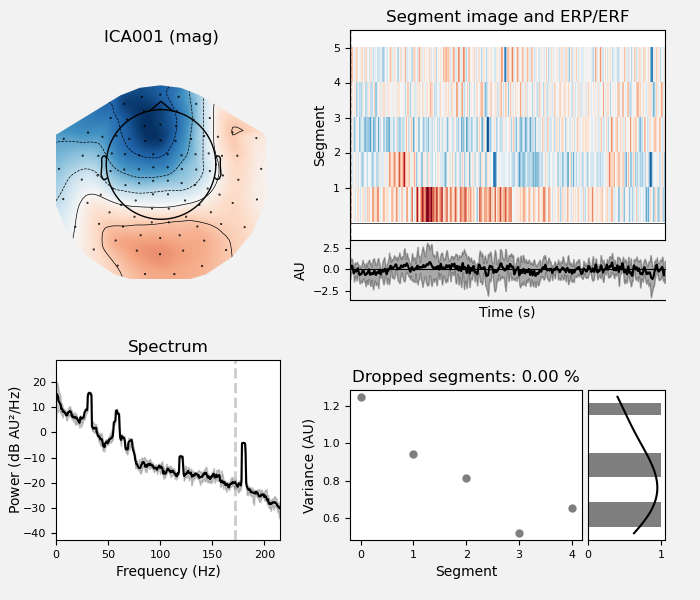

In [3]:
from mne.preprocessing import ICA

ica = ICA(n_components=2, max_iter="auto", random_state=97)
ica.fit(raw)
ica
ica_plot = ica.plot_properties(raw, show=False)